### Imports + load data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
path_2022 = "../data/movilidad_provincias_2022.csv"
path_2023 = "../data/movilidad_provincias_2023.csv"
path_2024 = "../data/movilidad_provincias_2024.csv"

original_data_2022 = pd.read_csv(path_2022, sep=",")
original_data_2023 = pd.read_csv(path_2023, sep=",")
original_data_2024 = pd.read_csv(path_2024, sep=",")

df_2022 = original_data_2022.copy()
df_2023 = original_data_2023.copy()
df_2024 = original_data_2024.copy()

df = pd.concat([df_2022, df_2023, df_2024])

# Load holidays
path_holidays = "../data/bank_holidays.csv"
original_holidays = pd.read_csv(path_holidays, sep=";", encoding='ISO-8859-1')
dfh = original_holidays.copy()

### EDA

In [3]:
dfh.head(10)

,cod_provincia,desc_provincia,ine_auto_name,holiday_date,holiday_type,holiday_desc
0,21,Huelva,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
1,18,Granada,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
2,37,Salamanca,Castilla Y León,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
3,14,Córdoba,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
4,41,Sevilla,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
5,11,Cádiz,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
6,44,Teruel,Aragón,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
7,22,Huesca,Aragón,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
8,4,Almería,Andalucía,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo
9,49,Zamora,Castilla Y León,2023-01-02,Autonómico,Lunes siguiente a Año Nuevo


In [4]:
# Filtrar solo festivos en provincias insulares
codigos_provincias_insulares = [7, 35, 38] # Baleares, Las Palmas y Santa Cruz de Tenerife
dfh_insulares = dfh[dfh['cod_provincia'].isin(codigos_provincias_insulares)]
dfh_insulares.head(10)

,cod_provincia,desc_provincia,ine_auto_name,holiday_date,holiday_type,holiday_desc
31,38,Santa Cruz de Tenerife,Canarias,2023-01-06,Nacional,Epifanía del Señor
42,35,"Palmas, Las",Canarias,2023-01-06,Nacional,Epifanía del Señor
73,7,"Balears, Illes","Balears, Illes",2023-01-06,Nacional,Epifanía del Señor
96,35,"Palmas, Las",Canarias,2023-04-06,Autonómico,Jueves Santo
133,38,Santa Cruz de Tenerife,Canarias,2023-04-07,Nacional,Viernes Santo
153,7,"Balears, Illes","Balears, Illes",2023-04-07,Nacional,Viernes Santo
173,35,"Palmas, Las",Canarias,2023-04-07,Nacional,Viernes Santo
207,35,"Palmas, Las",Canarias,2023-05-01,Nacional,Fiesta del Trabajo
231,7,"Balears, Illes","Balears, Illes",2023-05-01,Nacional,Fiesta del Trabajo
239,38,Santa Cruz de Tenerife,Canarias,2023-05-01,Nacional,Fiesta del Trabajo


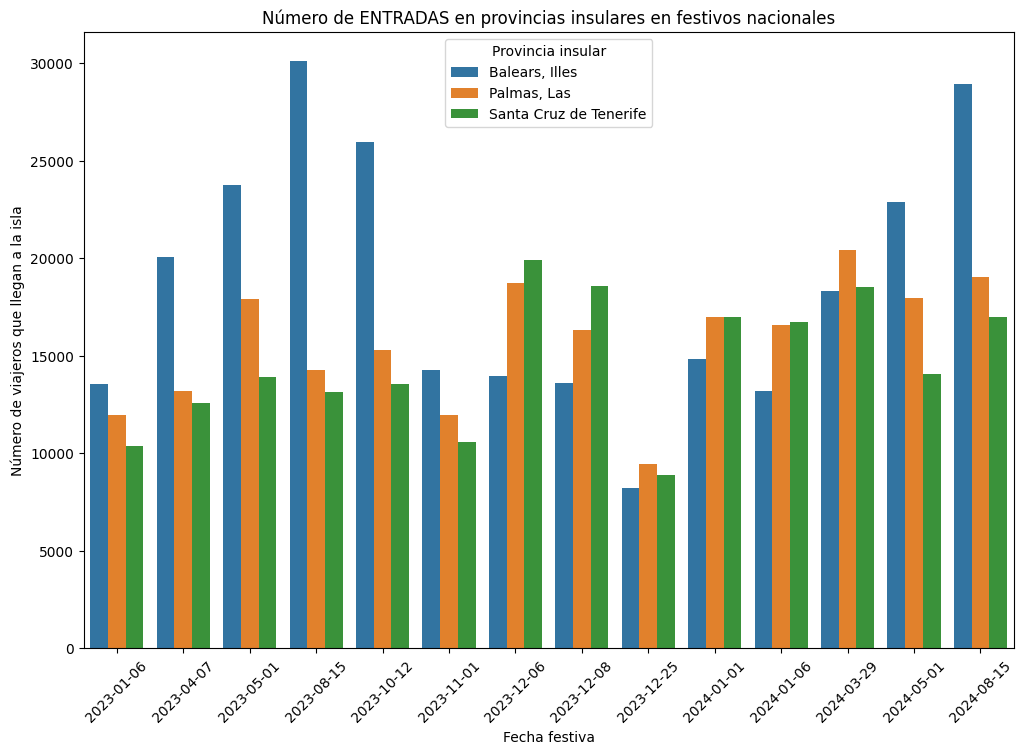

In [5]:
# Barplot con el numero de LLEGADAS de viajeros por provincia insular en cada una de las fechas festivas

festivos_nacionales = dfh_insulares[dfh_insulares['holiday_type'] == 'Nacional']
fechas_festivas = festivos_nacionales['holiday_date'].unique()

total_entradas_viajeros = df.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
total_entradas_viajeros_islas = total_entradas_viajeros[total_entradas_viajeros['provincia_destino_name'].isin(['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife'])]
total_entradas_viajeros_islas_fechas_festivas = total_entradas_viajeros_islas[total_entradas_viajeros_islas['day'].isin(fechas_festivas)]
total_entradas_viajeros_islas_fechas_festivas

plt.figure(figsize=(12, 8))
sns.barplot(data=total_entradas_viajeros_islas_fechas_festivas, x='day', y='viajeros', hue='provincia_destino_name')
plt.xticks(rotation=45)
plt.title('Número de ENTRADAS en provincias insulares en festivos nacionales')
plt.xlabel('Fecha festiva')
plt.ylabel('Número de viajeros que llegan a la isla')
plt.legend(title='Provincia insular')
plt.show()

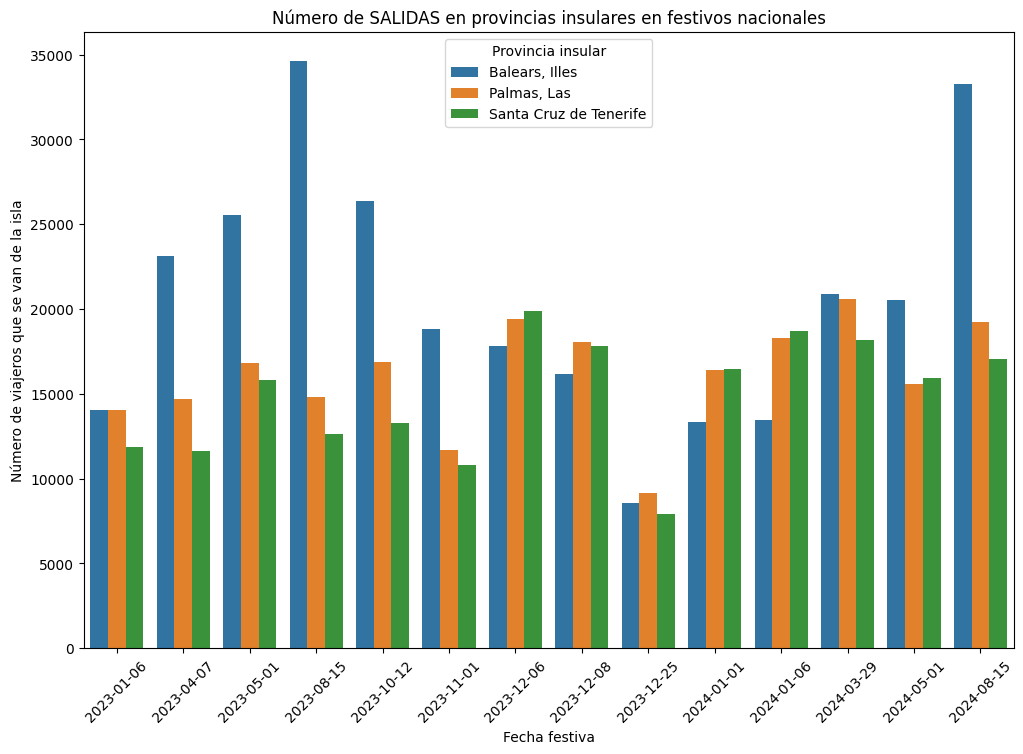

In [6]:
# Barplot con el numero de SALIDAS de viajeros por provincia insular en cada una de las fechas festivas

total_salidas_viajeros = df.groupby(['day', 'provincia_origen_name'])['viajeros'].sum().reset_index()
total_salidas_viajeros_islas = total_salidas_viajeros[total_salidas_viajeros['provincia_origen_name'].isin(['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife'])]
total_salidas_viajeros_islas_fechas_festivas = total_salidas_viajeros_islas[total_salidas_viajeros_islas['day'].isin(fechas_festivas)]
total_salidas_viajeros_islas_fechas_festivas

plt.figure(figsize=(12, 8))
sns.barplot(data=total_salidas_viajeros_islas_fechas_festivas, x='day', y='viajeros', hue='provincia_origen_name')
plt.xticks(rotation=45)
plt.title('Número de SALIDAS en provincias insulares en festivos nacionales')
plt.xlabel('Fecha festiva')
plt.ylabel('Número de viajeros que se van de la isla')
plt.legend(title='Provincia insular')
plt.show()

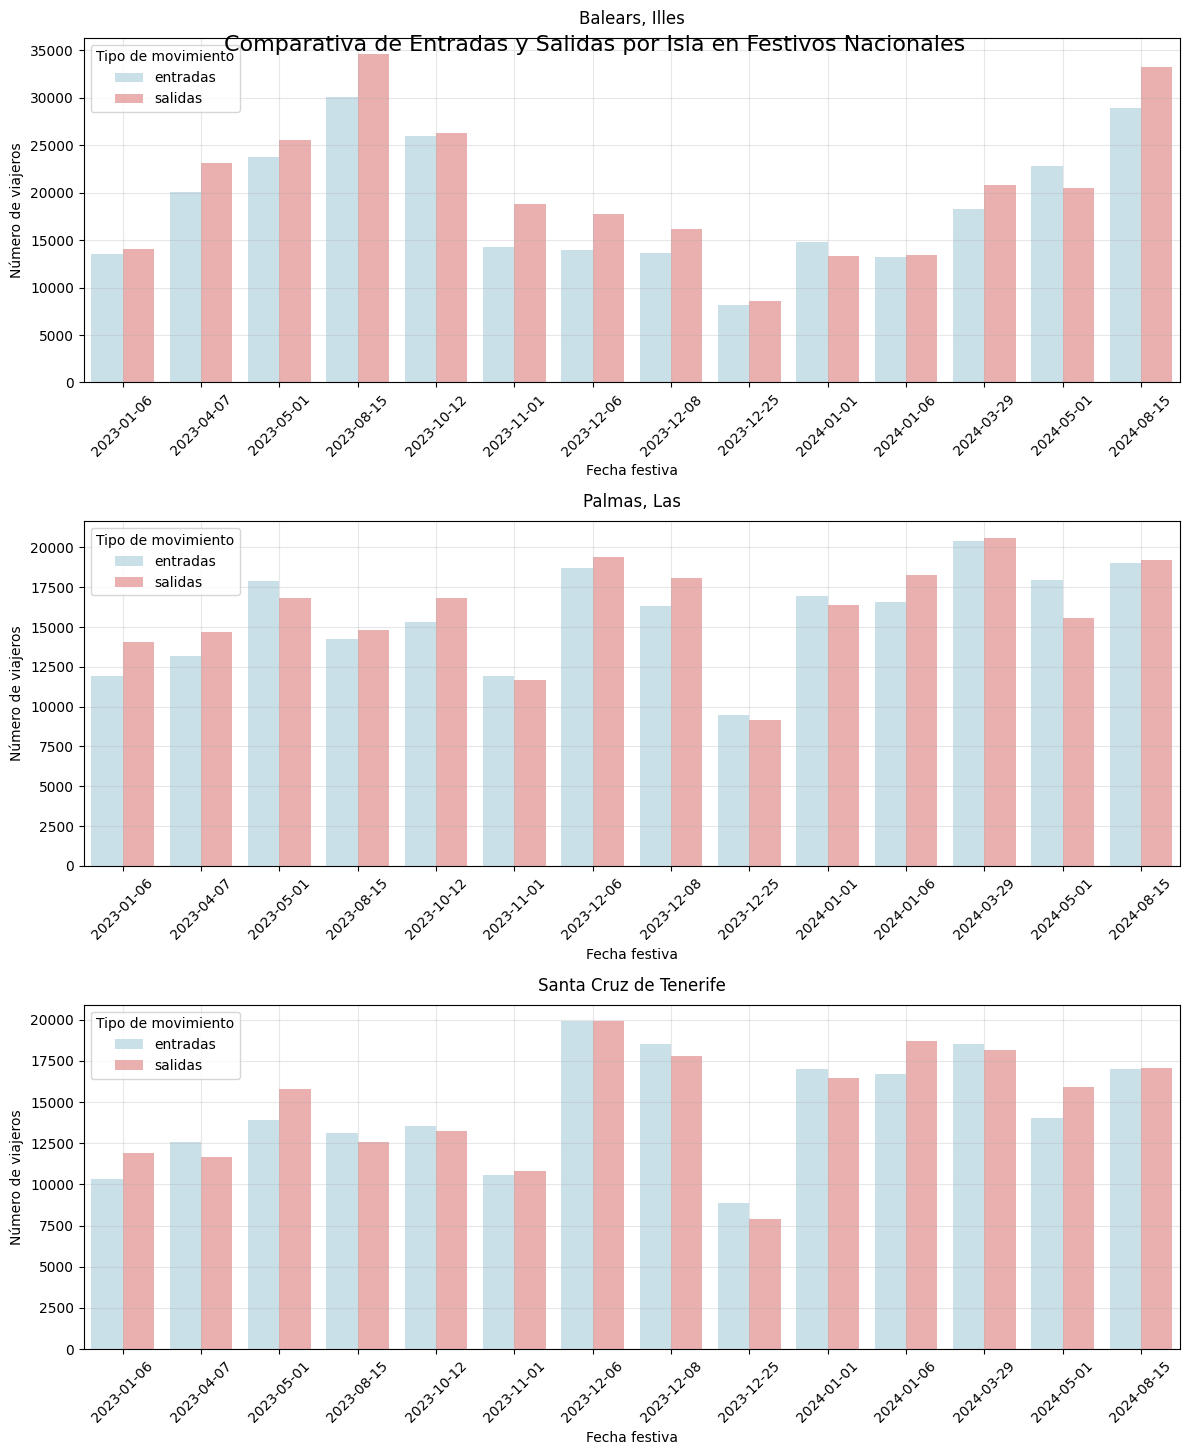

In [7]:
# Comparativa de entradas y salidas en provincias insulares en festivos nacionales

# Preparar datos para comparación
df_comparacion = pd.merge(
    total_entradas_viajeros_islas_fechas_festivas.rename(columns={'viajeros': 'entradas', 'provincia_destino_name': 'provincia'}),
    total_salidas_viajeros_islas_fechas_festivas.rename(columns={'viajeros': 'salidas', 'provincia_origen_name': 'provincia'}),
    on=['day', 'provincia']
)

# Convertir a formato "largo" para facilitar la visualización
df_comparacion_long = pd.melt(
    df_comparacion, 
    id_vars=['day', 'provincia'], 
    value_vars=['entradas', 'salidas'],
    var_name='tipo_movimiento',
    value_name='viajeros'
)

# Crear subplots para cada isla
fig, axes = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Comparativa de Entradas y Salidas por Isla en Festivos Nacionales', fontsize=16, y=0.95)

# Colores para entradas y salidas
colors = ['lightblue', 'lightcoral']
islas = ['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife']

for idx, isla in enumerate(islas):
    # Filtrar datos para la isla actual
    datos_isla = df_comparacion_long[df_comparacion_long['provincia'] == isla]
    
    # Crear el gráfico para la isla
    sns.barplot(
        data=datos_isla,
        x='day',
        y='viajeros',
        hue='tipo_movimiento',
        palette=colors,
        alpha=0.7,
        ax=axes[idx]
    )
    
    # Personalizar cada subplot
    axes[idx].set_title(f'{isla}', pad=10)
    axes[idx].set_xlabel('Fecha festiva')
    axes[idx].set_ylabel('Número de viajeros')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Tipo de movimiento')
    
    # Ajustar el formato
    axes[idx].grid(True, alpha=0.3)
    
# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

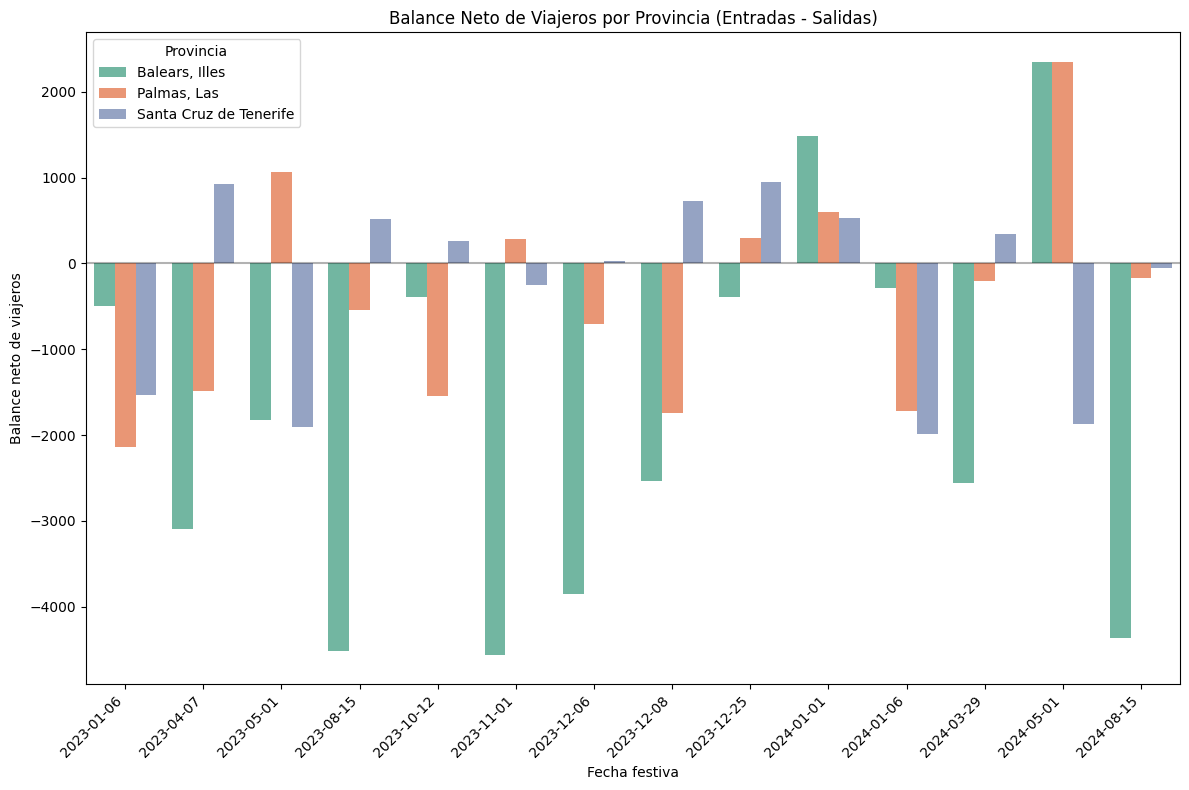

In [8]:
# Calcular el balance neto de viajeros (entradas - salidas)
df_comparacion['balance_neto'] = df_comparacion['entradas'] - df_comparacion['salidas']

plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_comparacion,
    x='day',
    y='balance_neto',
    hue='provincia',
    palette='Set2'
)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.title('Balance Neto de Viajeros por Provincia (Entradas - Salidas)')
plt.xlabel('Fecha festiva')
plt.ylabel('Balance neto de viajeros')
plt.legend(title='Provincia')
plt.tight_layout()
plt.show()

In [9]:
# Flow chart con los datos que se han usado para hacer el EDA de los festivos nacionales


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
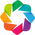

In [10]:
# Importar holoviews
import holoviews as hv
from holoviews import opts, dim
hv.extension('bokeh')

In [12]:

# Filtrar solo los viajes hacia provincias insulares
provincias_insulares = ['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife']
flujos_islas = df[df['provincia_destino_name'].isin(provincias_insulares)]

# Agrupar los datos para obtener el total de viajeros por origen-destino
flujos_totales = flujos_islas.groupby(['provincia_origen_name', 'provincia_destino_name'])['viajeros'].sum().reset_index()

# Filtrar solo las conexiones con más de 1000 viajeros (ajusta este número según necesites)
#flujos_totales = flujos_totales[flujos_totales['viajeros'] > 1000]

# Preparar los nodos únicos
nodos_origen = flujos_totales['provincia_origen_name'].unique()
nodos_destino = flujos_totales['provincia_destino_name'].unique()
nodos_unicos = np.union1d(nodos_origen, nodos_destino)

# Preparar los datos para el diagrama Sankey
""" nodes = pd.DataFrame({
    'index': list(flujos_totales['provincia_origen_name'].unique()) + list(provincias_insulares),
    'label': list(flujos_totales['provincia_origen_name'].unique()) + list(provincias_insulares)
}) """
nodes = pd.DataFrame({
    'index': range(len(nodos_unicos)),
    'label': nodos_unicos
})
node_map = {node: idx for idx, node in enumerate(nodos_unicos)}

# TODO: El problema tiene que estar aquí
edges = flujos_totales.rename(columns={
    'provincia_origen_name': 'source',
    'provincia_destino_name': 'target',
    'viajeros': 'value'
})
""" edges = pd.DataFrame({
    'source': [node_map[x] for x in flujos_totales['provincia_origen_name']],
    'target': [node_map[x] for x in flujos_totales['provincia_destino_name']],
    'value': flujos_totales['viajeros']
}) """

# Crear el diagrama
sankey = hv.Sankey(
    (edges, nodes), 
    kdims=['source', 'target'], 
    vdims=['value']
)

# Configurar la visualización
sankey.opts(
    opts.Sankey(
        width=800,
        height=600,
        label_position='left',
        edge_color=dim('source').str(),
        node_color=dim('index').str(),
        title='Flujo de viajeros desde provincias peninsulares hacia provincias insulares',
        tools=['hover'],
        node_padding=10,
        edge_line_width=0.5,
        cmap='Set3'
    )
)

# Mostrar el diagrama
sankey

KeyboardInterrupt: 